# Christie Woodside HW5 Problem Set 2 CDC Data

### 1. From the CDC data, select 10 measures of your choice and 3 states of your preference.
### Use only these data.

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
'''From this link: https://data.cdc.gov/500-Cities-Places/PLACES-Local-Data-for-Better-Health-County-Data-20/swc5-untb/about_data'''

df = pd.read_csv('PLACES__Local_Data_for_Better_Health__County_Data_2024_release_20240828.csv')
measure_columns = [col for col in df.columns if 'measure' in col.lower()]

unique_values = {col: df[col].unique() for col in measure_columns}
# for col, values in unique_values.items():
    #print(f"Unique values in '{col}':\n {values}")

/Users/christiewoodside/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


I will do MeasureID column with: STROKE, SLEEP, ARTHRITIS, CANCER, OBESITY, HIGHCHOL, DIABETES, CSMOKING, FOODINSECU, and HOUSEINSECU.

Also California (CA), Georgia (GA), and Indiana (IN)

In [52]:
states = ['California', 'Georgia', 'Indiana']
measure_ids = ['STROKE', 'SLEEP', 'ARTHRITIS', 'CANCER', 'OBESITY', 'HIGHCHOL', 'DIABETES', 'CSMOKING', 'FOODINSECU', 'HOUSINSECU']
#print(df['MeasureId'].unique())

f_df = df[(df['StateDesc'].isin(states)) & (df['MeasureId'].isin(measure_ids))]

print(f_df.head())

    Year StateAbbr   StateDesc  LocationName DataSource         Category  \
46  2022        CA  California  Contra Costa      BRFSS  Health Outcomes   
47  2022        CA  California     El Dorado      BRFSS  Health Outcomes   
50  2022        CA  California          Inyo      BRFSS  Health Outcomes   
51  2022        CA  California          Kern      BRFSS  Health Outcomes   
52  2022        CA  California          Lake      BRFSS  Health Outcomes   

                 Measure Data_Value_Unit          Data_Value_Type  Data_Value  \
46  Obesity among adults               %         Crude prevalence        28.6   
47  Obesity among adults               %         Crude prevalence        24.7   
50   Stroke among adults               %         Crude prevalence         3.9   
51   Stroke among adults               %         Crude prevalence         3.7   
52   Stroke among adults               %  Age-adjusted prevalence         3.3   

    ... Low_Confidence_Limit High_Confidence_Limit  Tota

## 2.Describe the distribution of these measures and support your description with relevant plots. Does the distribution differ by state? Justify your answer with the appropriate plots.

In [53]:
'''Used to just look at descriptive statistics'''
print(f_df.groupby(['StateDesc', 'MeasureId'])['Data_Value'].describe())

# Boxplot to show the distribution of measures by state
# plt.figure(figsize=(12, 6))
# sns.boxplot(x='MeasureId', y='Data_Value', hue='StateDesc', data=f_df)
# plt.title('Distribution of Measures by State')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

                       count       mean       std   min     25%    50%  \
StateDesc  MeasureId                                                     
California ARTHRITIS   116.0  23.277586  4.201451  16.2  20.750  22.20   
           CANCER      116.0   7.547414  1.795379   5.2   6.200   7.20   
           CSMOKING    116.0  13.150000  2.570349   7.3  11.175  13.20   
           DIABETES    116.0  11.056897  1.670888   7.3   9.800  10.90   
           FOODINSECU  116.0  15.825862  5.050960   7.4  12.075  14.85   
           HIGHCHOL    116.0  32.775862  3.106672  27.0  30.375  32.00   
           HOUSINSECU  116.0  14.033621  3.855903   7.1  11.100  13.50   
           OBESITY     116.0  30.214655  4.278668  17.6  28.400  30.20   
           SLEEP       116.0  34.788793  2.580353  28.3  33.000  34.90   
           STROKE      116.0   3.377586  0.651431   2.1   2.900   3.25   
Georgia    ARTHRITIS   318.0  29.066038  3.853006  15.1  26.800  28.30   
           CANCER      318.0   7.48553

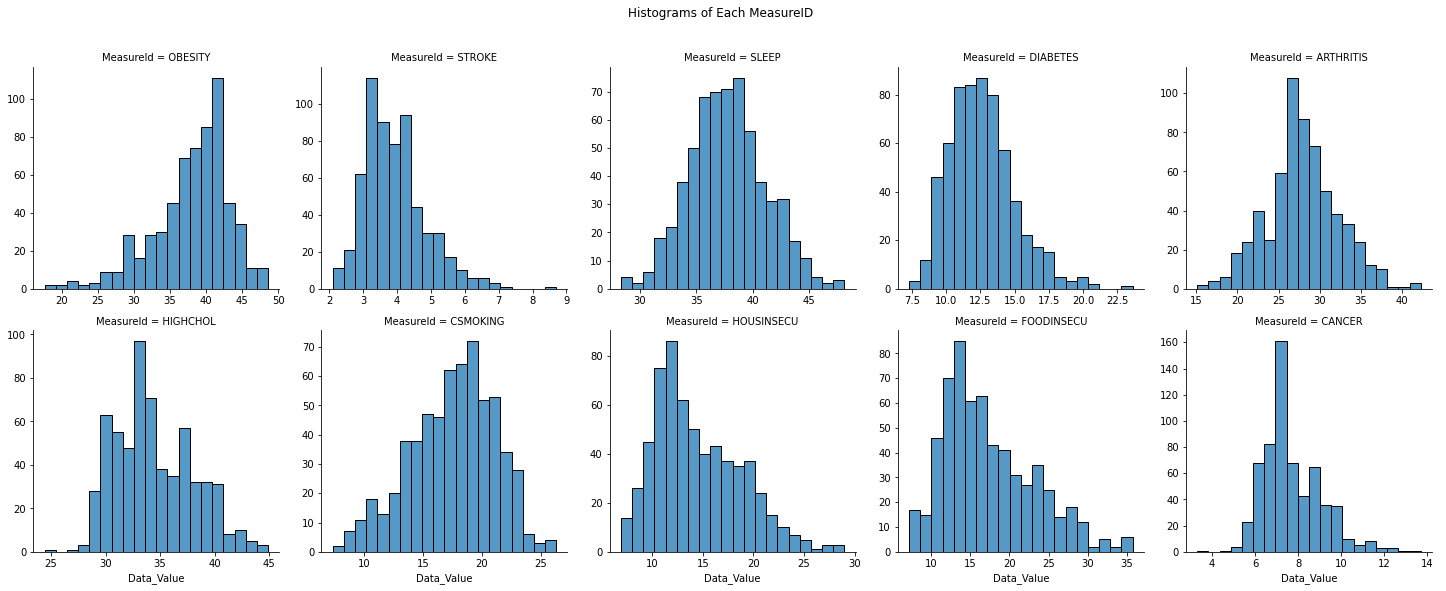

In [54]:
g = sns.FacetGrid(f_df, col='MeasureId', col_wrap=5, height=4, sharex=False, sharey=False)
g.map(sns.histplot, 'Data_Value', kde=False, bins=20)
g.add_legend()
plt.suptitle('Histograms of Each MeasureID', y=1.02)
plt.tight_layout()
plt.show()

This plot is looking at all of the data values for the measureIDs for all three states. This allows for me to see the distribution of the values.

For arthritis, it is relatively centered with a normal distrubution, so it is unimodal and symmetric. Sleep also is unimodal and symmetric for the data values. Obesity is slightly skewed to the left and unimodal. Stroke, HOUSEINSECU, and FoodInsecu appear to be skewed to the right and potentially unimodaler, while Diabetes is the same, but only slightly skewed. HighChol appears to centered but not quite symmetrical and is definitely multimodal.

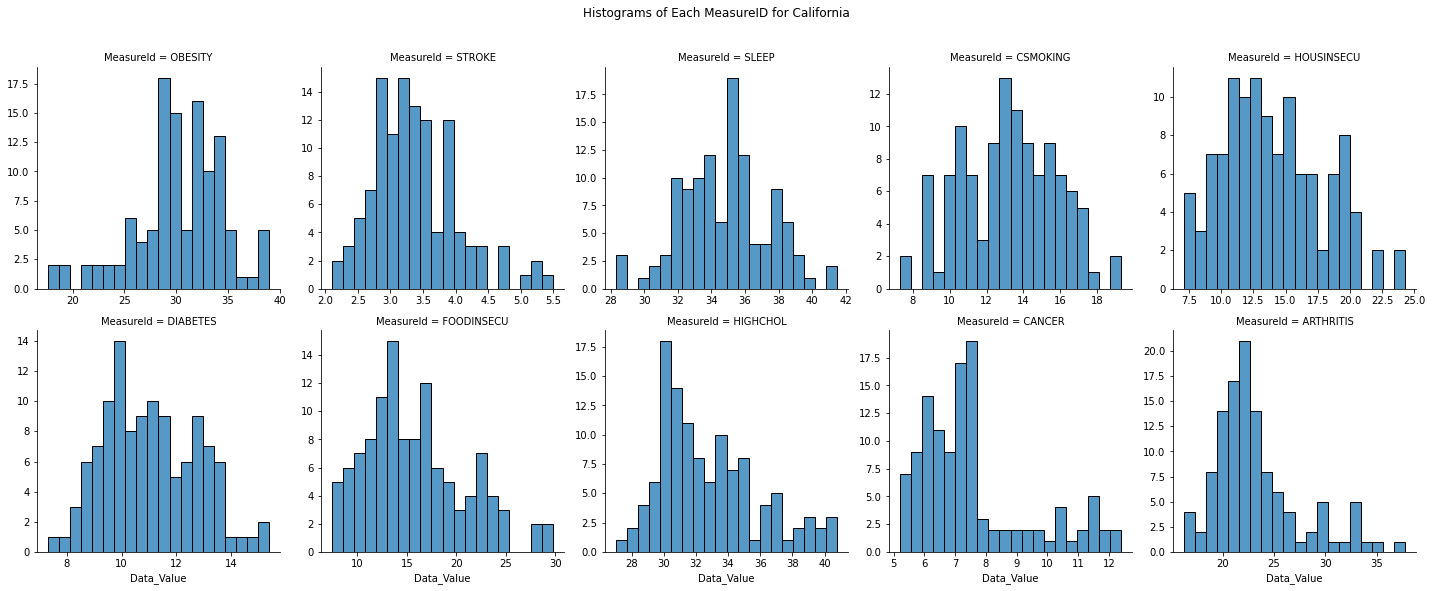

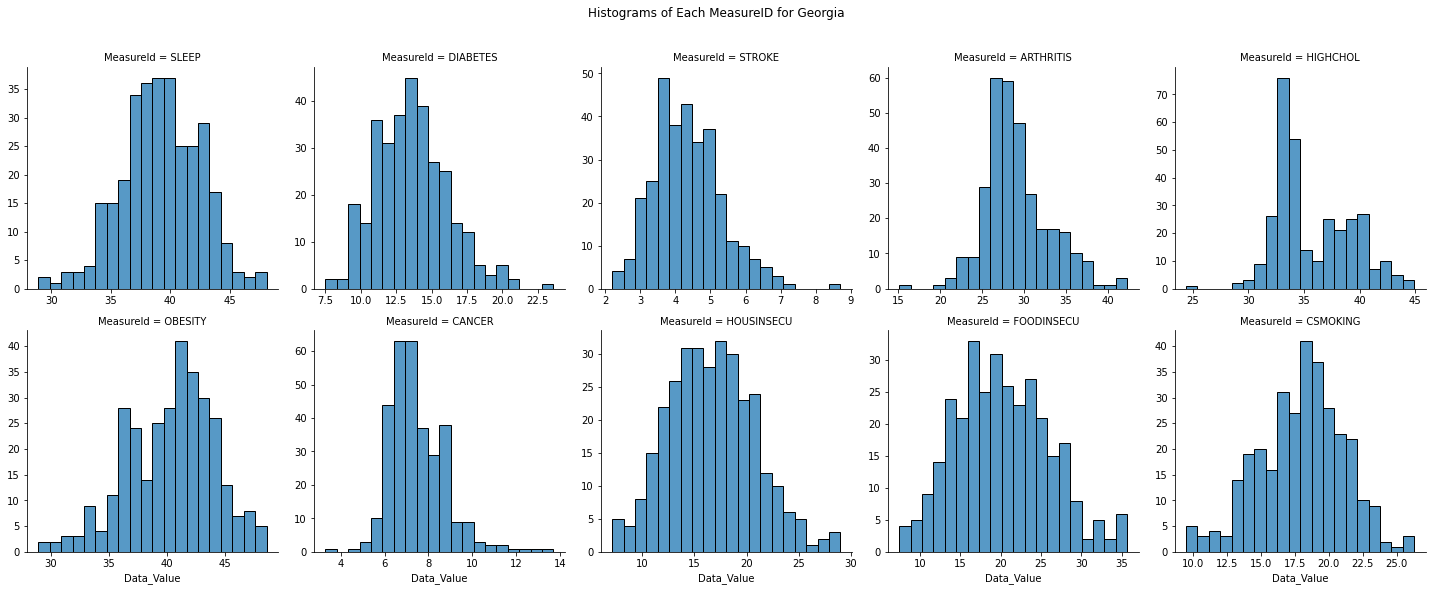

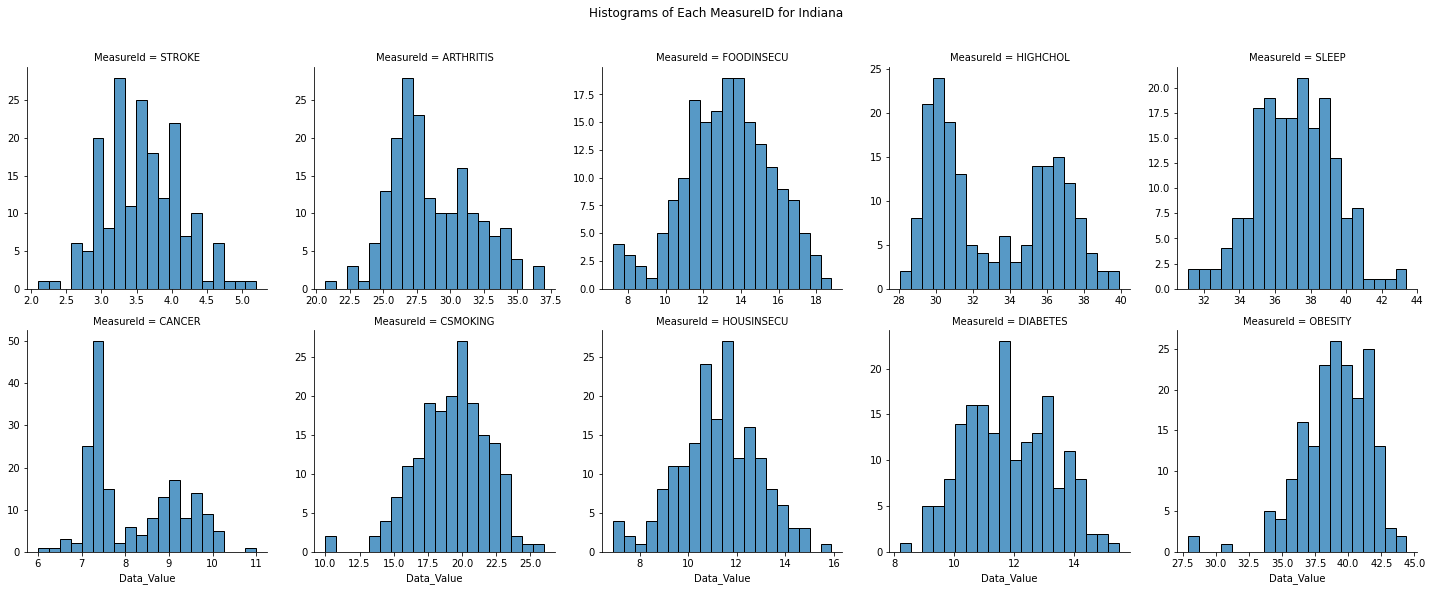

In [55]:
f_df = df[(df['StateDesc'].isin(states)) & (df['MeasureId'].isin(measure_ids))]

for state in states:
    state_df = f_df[f_df['StateDesc'] == state]
    g = sns.FacetGrid(state_df, col='MeasureId', col_wrap=5, height=4, sharex=False, sharey=False)
    g.map(sns.histplot, 'Data_Value', kde=False, bins=20)
    
    g.fig.suptitle(f'Histograms of Each MeasureID for {state}', y=1.02)
    
    plt.tight_layout()
    plt.show()

This is the histograms for each states' data values for each measureID. The distrubution for some measures can definitely vary by state. Sleep measure seems to be unimodal for all three states, a wide distribution, and the center values are relatively between 35-40. Sleep of California could be argued as multimodal, because some some aggresive drops, but appears to be relatively symmatrical. 

For FoodInsecurity, all three appear to be multimodal with almost a small tail on either the left or roght side. The center of the distribution for all three states is widely different with Indiana being around 13-14 (food insecurity in the past 12 months for adults), 20-21 for georgia, and 15 for California. 

HighChol appears to be bimodal in both Indiana and Georgia, but more multimodal / skewed right in California. In Indiana the two peaks are between 30-31 and 36-37 (High cholesterol amongst adults who have never been screened). In georgia the peaks are around 34 and 40. California is slightly skewed with the highest peak at around 30 and the distrubution as 28-40. 

## 3. Investigate the relationship these measures, discuss and support with relevant plots 


#### Taking this from the other HW5 homework for analysis: Run all pairwise scatter plots, find pairs of measures that have the strongest relationships, and discuss the nature of these relationships: monotonic, linear, or non-linear.

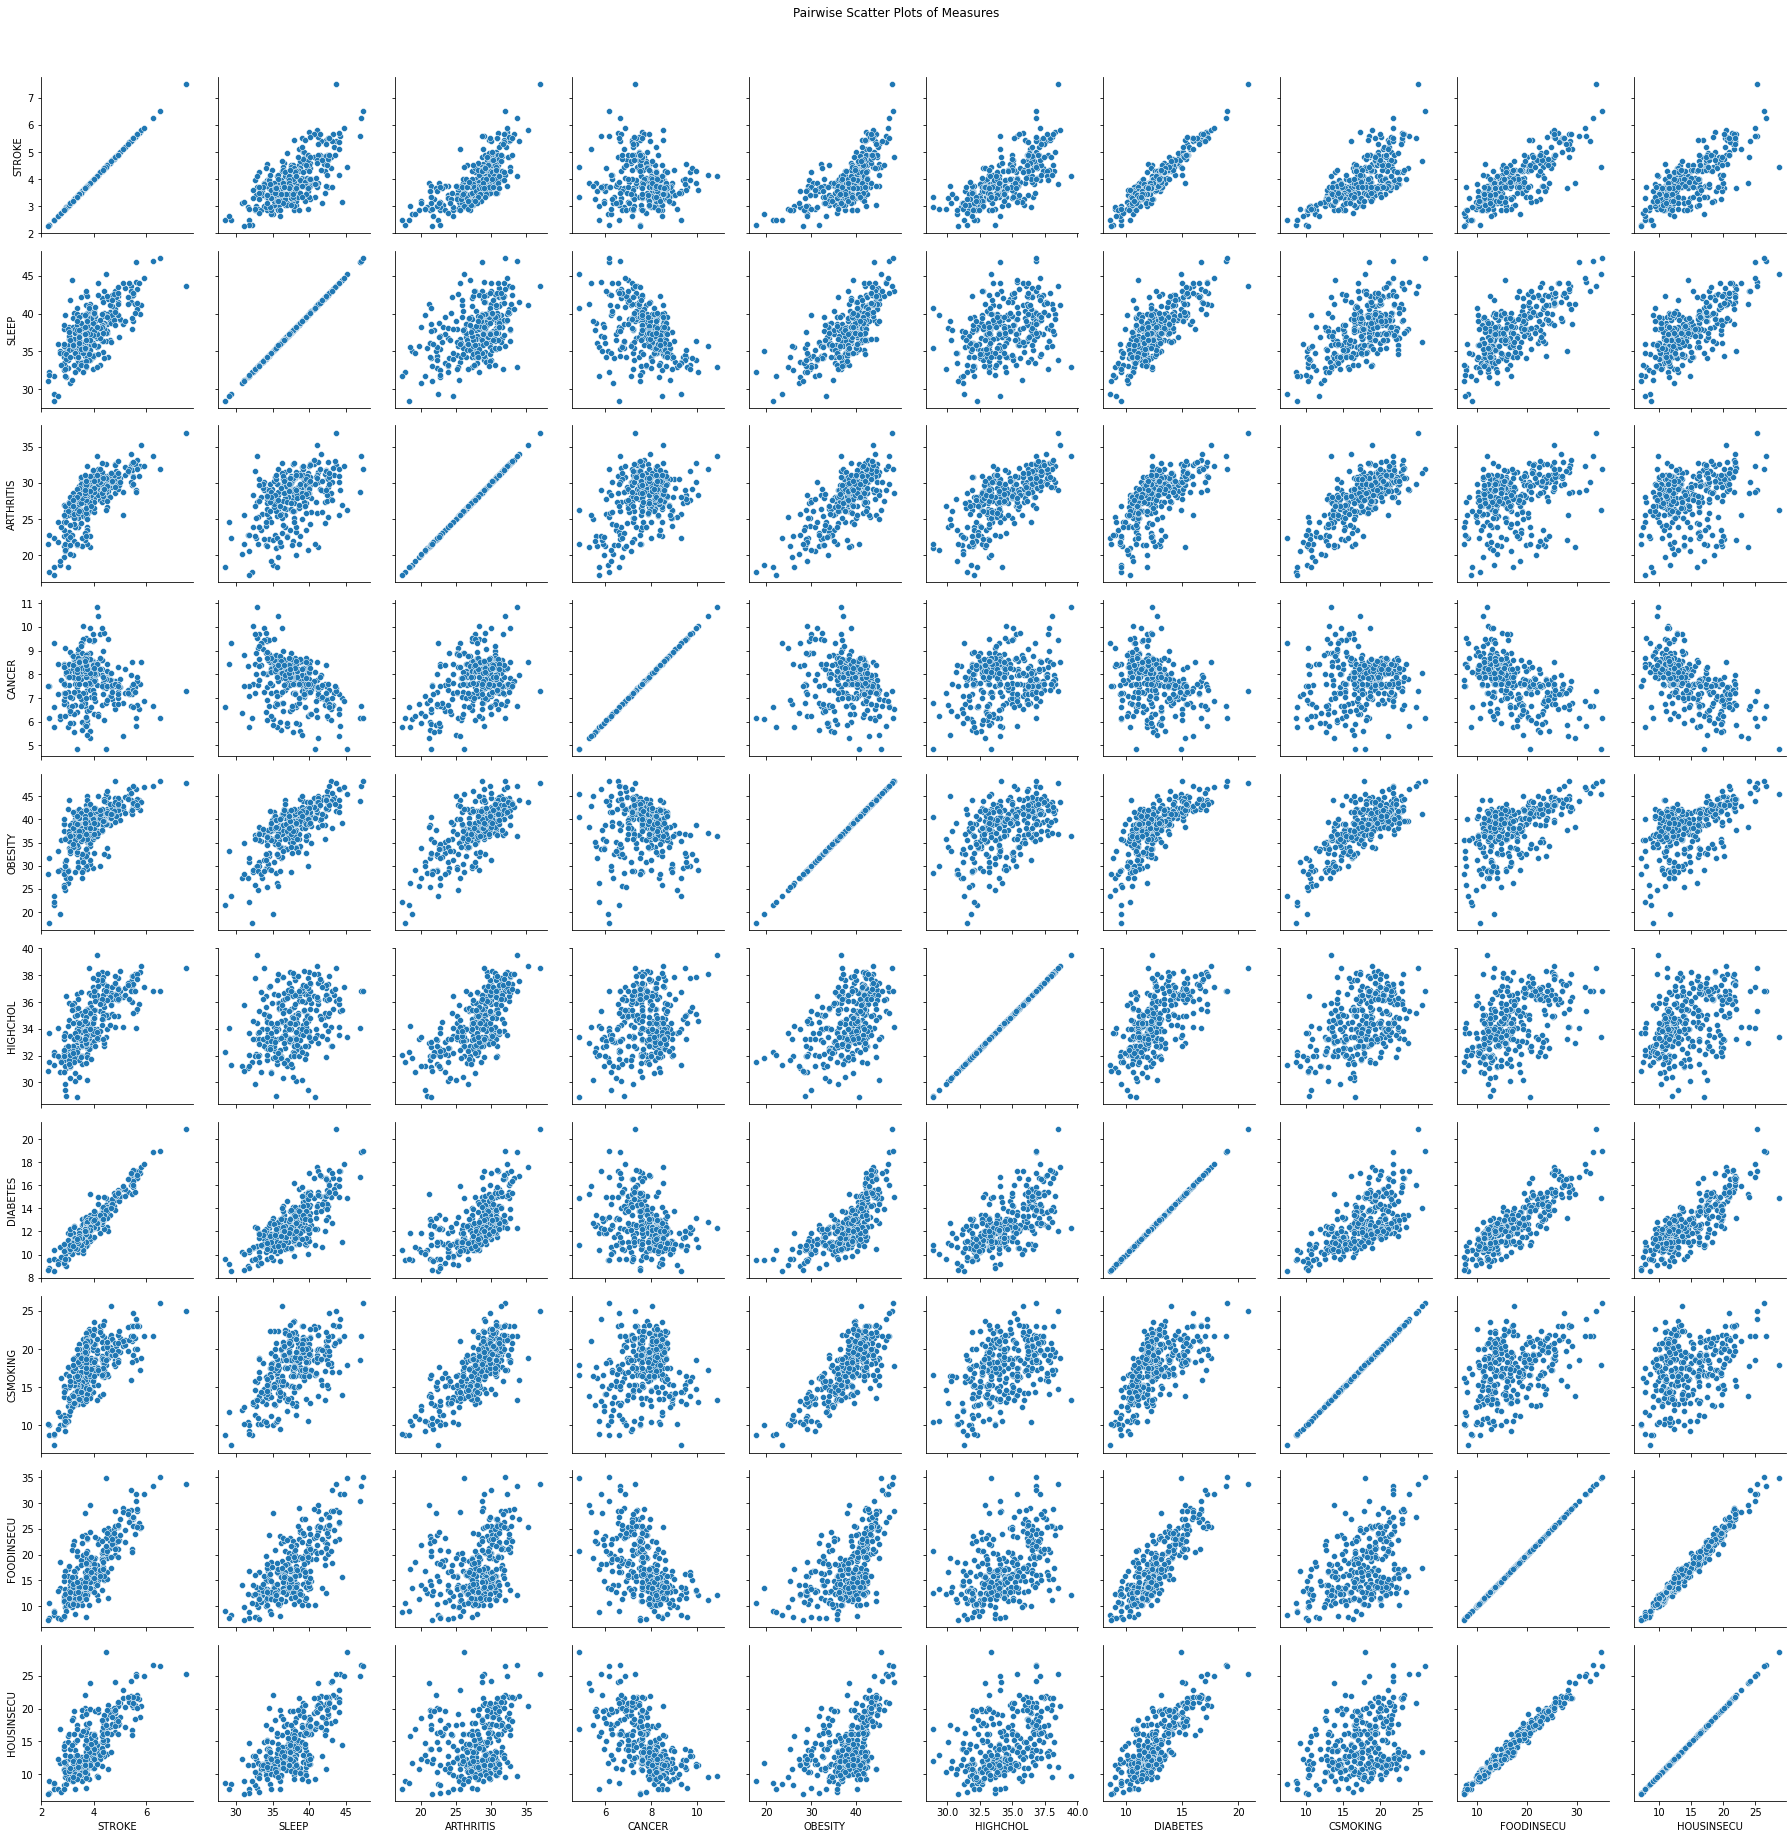

In [56]:
'''There is no log here'''
#print(f_df['MeasureId'].unique())
filtered_df = df[(df['StateDesc'].isin(states)) & (df['MeasureId'].isin(measure_ids))]
pivot_df = filtered_df.pivot_table(index=['LocationID', 'StateDesc'], columns='MeasureId', values='Data_Value').reset_index()

sns.pairplot(pivot_df[measure_ids], diag_kind=None) #so no histograms in the diagonal
plt.suptitle('Pairwise Scatter Plots of Measures', y=1.02)
plt.tight_layout()
plt.show()

There are many graphs, but its easier to see the trends easier all at once. The diagonal is the same measures against itself so ignore.

Foodinsecurity and Houseinsecurity seem to be very positively correlated (bottom right two graphs). The data points are a very distinct line and show a general upward trend. This would make sense because if someone had insecure housing they definitely would most likely have food insecurity. They go hand in hand roughly. 

Diabetes and stroke also have a consistent trend with a positive correlation (first row 4th plot from the right). The data is also a very consistent line with only slight deviation. This would make sense, because if someone is obese this can have a lot of health complications and lead to strokes or heart attacks.

Sleep and houseinsecurity (bottom left or second row all the way to the right)also appear to have a positive correlation, slightly weak, but this relationship would make sense. If you are struggling with housing and it is not consistent you may not be sleeping well or at all.

There also seems to be a slight positive correlation between diabetes and foodinsecurity and diabetes and housing insecurity. There are a few outliers but does follow a trend. This positive relationship could be that if you are insecure in your housing, you are probably insecure with your food, thus you don't have much money to spend and most cheap food in america is unhealthy and high in sugar which could lead to health conditions such as diabetes. 

HighChol and sleep plots would be a great example of no correlation/very weak, because it just a blob of points with no distinct trend or correlation. Arthritis and sleep could also be argued the same. There are too many graphs to comment on, btu hopefully this gives you an idea.

Houseinsecu and cancer (bottom left) seem to have a negative correlation which I find interesting, because I do not know why that would be. Probably no correlation. Obesity and cancer also appear to have a slight negative correlation, which is weird, because you would believe it to be the exact opposite. The value of cancer (non-skin) or age of melanoma amongst adults and colorectal screening amongst adults between 45-75, which neither is affiliated with obesity.

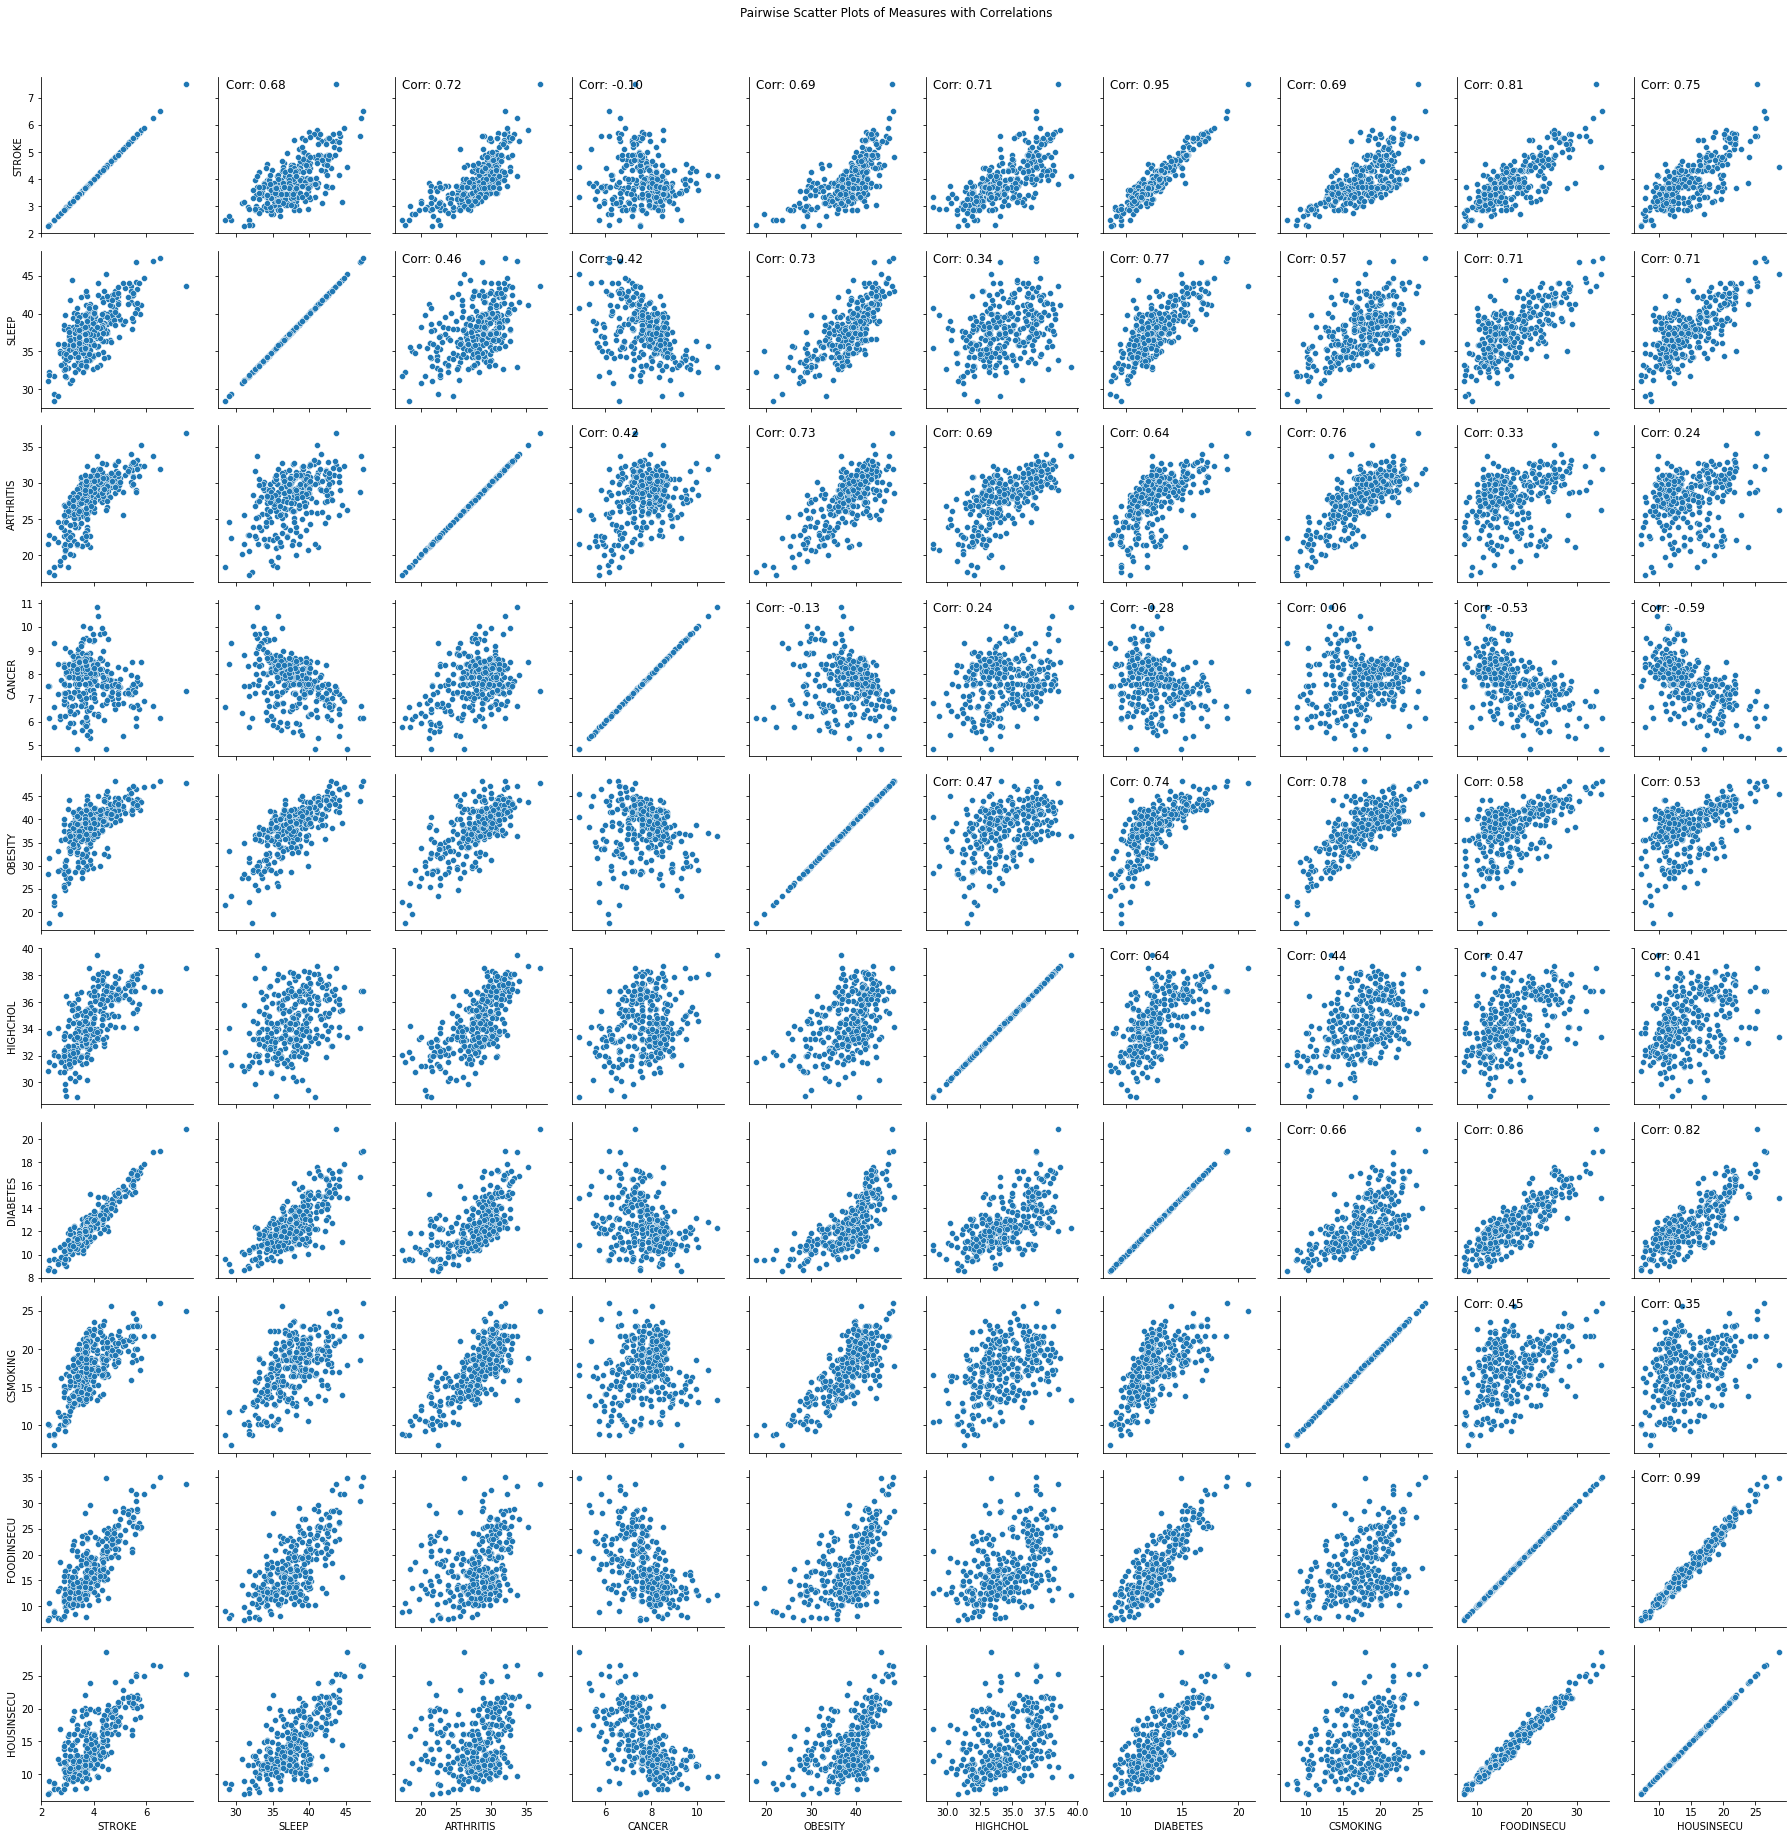

In [58]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Function to calculate and annotate correlation on scatter plots
def corrfunc(x, y, **kws):
    r = np.corrcoef(x, y)[0, 1]  # Calculate the correlation coefficient between x and y
    ax = plt.gca()  # Get the current axes
    ax.annotate(f'Corr: {r:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, ha='left', va='center')

# Generate pairwise scatter plots with correlations
g = sns.pairplot(pivot_df[measure_ids], diag_kind=None)

# Apply the correlation function to the upper triangle
g.map_upper(corrfunc)

# Add a title
plt.suptitle('Pairwise Scatter Plots of Measures with Correlations', y=1.02)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


Here we can now see the correlation coeffs of each of the graphs. Stroke and Diabetes has a coeff of 0.95 indicating very high correlation to eachother. Sleep and houseinsecu is 0.71 which is still relatively positively correlated. Cancer and obesity have negative 0.13 correlation which supports out negative correlation claim from before. Foodinsecu and house insecu is almost 100& positively correlation at 0.99. This shows that they are very very highly correlated and have a strong relationship.

### Taking log transformed values of a few graphs that have trending but weak relationships to see better

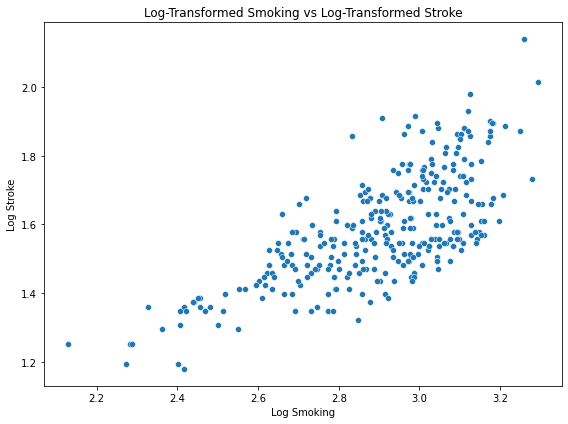

In [45]:
'''log smoking vs log stroke'''

pivot_df['log_CSMOKING'] = np.log(pivot_df['CSMOKING'] + 1)
pivot_df['log_STROKE'] = np.log(pivot_df['STROKE'] + 1)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='log_CSMOKING', y='log_STROKE', data=pivot_df)
plt.title('Log-Transformed Smoking vs Log-Transformed Stroke')
plt.xlabel('Log Smoking')
plt.ylabel('Log Stroke')
plt.tight_layout()
plt.show()

Can still see a positive trend, but the relationship appears to be weaker than I thought. In theory this pairing would make sense, because smoking can cause a variety of health issues that affect the lung and heart like strokes.

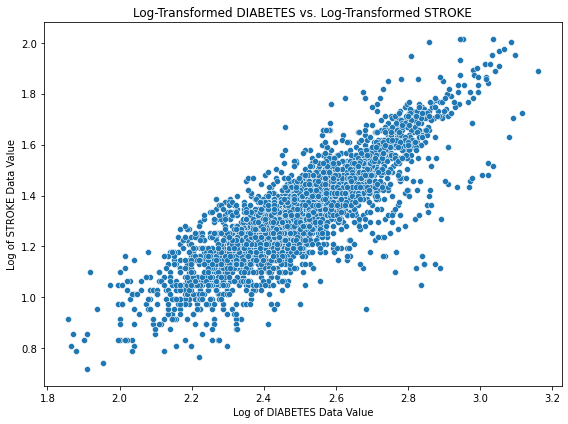

In [46]:
'''figure of log diabetes against log stroke to see the trend better'''
filtered_df = df[(df['MeasureId'].isin(['DIABETES', 'STROKE']))]

# Pivot the data so MeasureID becomes columns and the data values become rows
pivot_df = filtered_df.pivot_table(index=['LocationID', 'StateDesc'], columns='MeasureId', values='Data_Value').reset_index()

# Apply log transformation to the DIABETES and STROKE columns, avoiding negative/zero values
pivot_df['log_DIABETES'] = np.log(pivot_df['DIABETES'].replace(0, np.nan)).dropna()
pivot_df['log_STROKE'] = np.log(pivot_df['STROKE'].replace(0, np.nan)).dropna()

# Plot the scatter plot for log-transformed values
plt.figure(figsize=(8, 6))
sns.scatterplot(x='log_DIABETES', y='log_STROKE', data=pivot_df)
plt.title('Log-Transformed DIABETES vs. Log-Transformed STROKE')
plt.xlabel('Log of DIABETES Data Value')
plt.ylabel('Log of STROKE Data Value')
plt.tight_layout()
plt.show()

Looks very interesting and it is very tight in the middle. There is a positive correlation, but still seems to be many outliers. Just wanted to see what log transformation would look like for these values

In [47]:
'''Assess a pattern in sleep vs highchol'''
# pivot_df = filtered_df.pivot_table(index=['LocationID', 'StateDesc'], columns='MeasureId', values='Data_Value').reset_index()
# pivot_df['log_HIGHCHOL'] = np.log(pivot_df['HIGHCHOL'] + 1)
# pivot_df['log_SLEEP'] = np.log(pivot_df['SLEEP'] + 1)

# plt.figure(figsize=(8, 6))
# sns.scatterplot(x='log_HIGHCHOL', y='log_SLEEP', data=pivot_df)

# plt.title('Log-Transformed HIGHCHOL vs SLEEP')
# plt.xlabel('Log of HIGHCHOL (High Cholesterol)')
# plt.ylabel('Log of SLEEP')
# plt.tight_layout()
# plt.show()
'''Looks exactly the same as the one up top in the multigraph so it was not helpful.'''

'Looks exactly the same as the one up top in the multigraph so it was not helpful.'

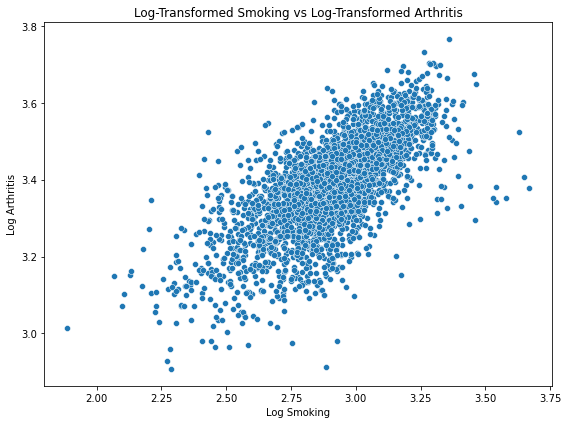

In [49]:
filtered_df = df[(df['MeasureId'].isin(['ARTHRITIS', 'CSMOKING']))]

# Pivot the data so MeasureID becomes columns and the data values become rows
pivot_df = filtered_df.pivot_table(index=['LocationID', 'StateDesc'], columns='MeasureId', values='Data_Value').reset_index()

pivot_df['log_CSMOKING'] = np.log(pivot_df['CSMOKING'] + 1)
pivot_df['log_ARTHRITIS'] = np.log(pivot_df['ARTHRITIS'] + 1)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='log_CSMOKING', y='log_ARTHRITIS', data=pivot_df)
plt.title('Log-Transformed Smoking vs Log-Transformed Arthritis')
plt.xlabel('Log Smoking')
plt.ylabel('Log Arthritis')
plt.tight_layout()
plt.show()

Shows to be positively correlated and trending positively. This shows that these two can have a relationship with eachother.